In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
cols = ["animal_name","hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"]
df = pd.read_csv("zoo.csv",names=cols)
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.drop(columns="animal_name", inplace=True)

In [6]:
print(df["type"].value_counts())   

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


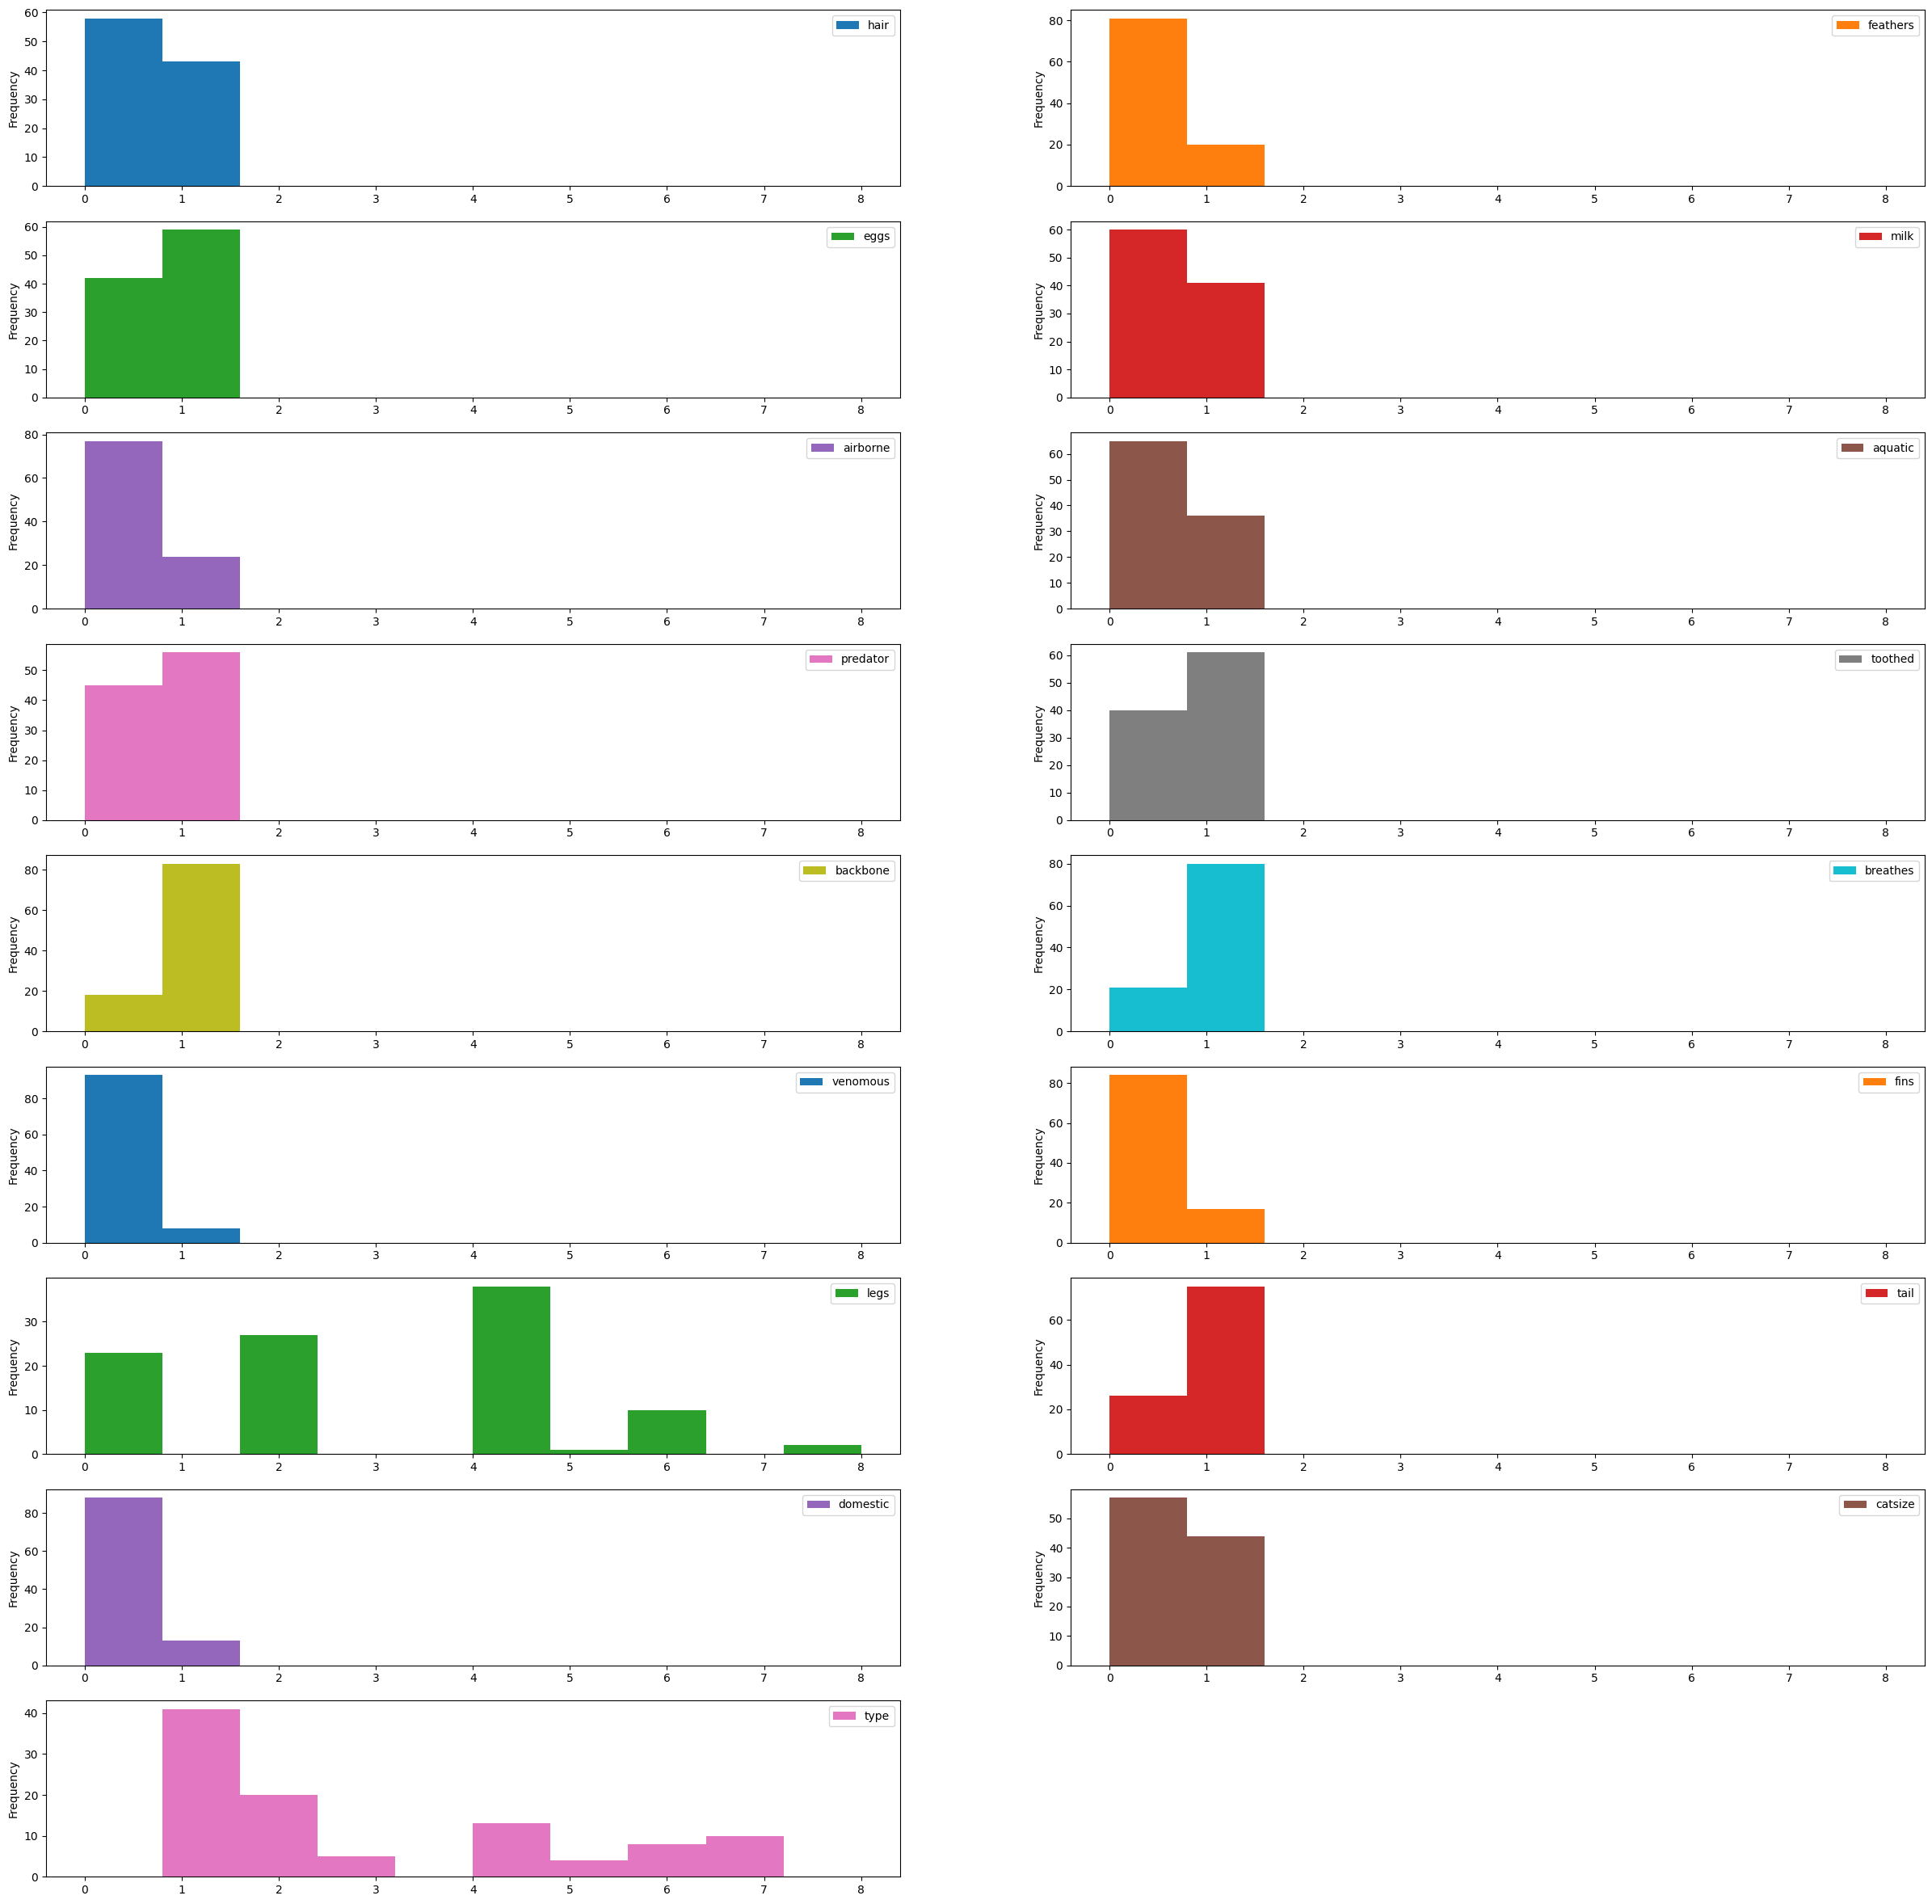

In [8]:
plt.rcParams['figure.figsize']=(30,30)
df.plot(kind='hist', bins=10, subplots=True, layout=(9,2), sharex=False, sharey=False)

plt.show()

In [9]:
corr_matrices = {}

# Compute correlations for each unique 'type'
for unique_type in df['type'].unique():
    # Subset the DataFrame by 'type'
    subset = df[df['type'] == unique_type]
    
    # Calculate the correlation matrix for numerical columns
    corr_matrices[unique_type] = subset.drop(columns=['type']).corr()

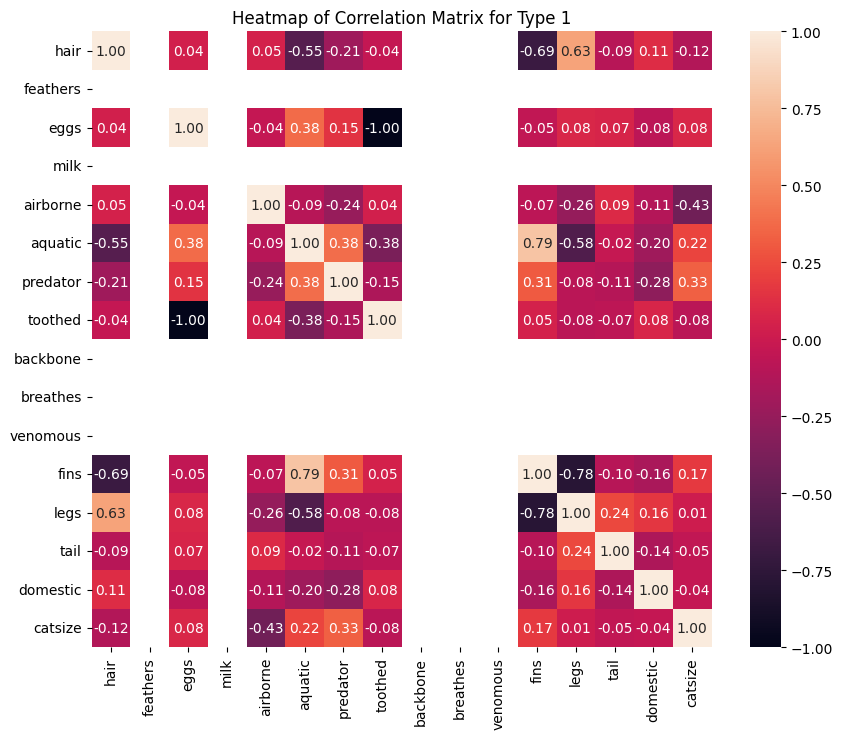

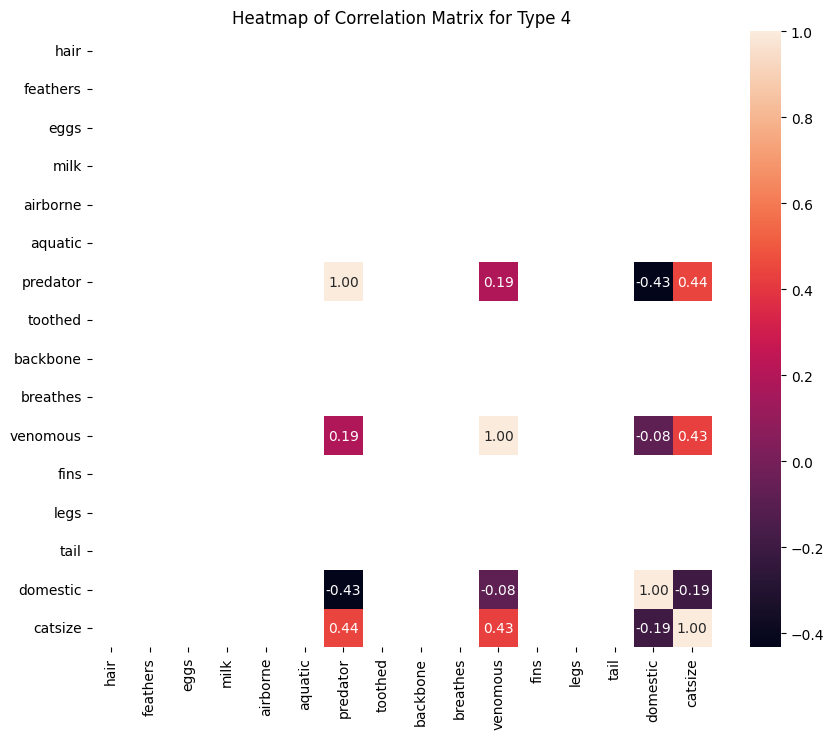

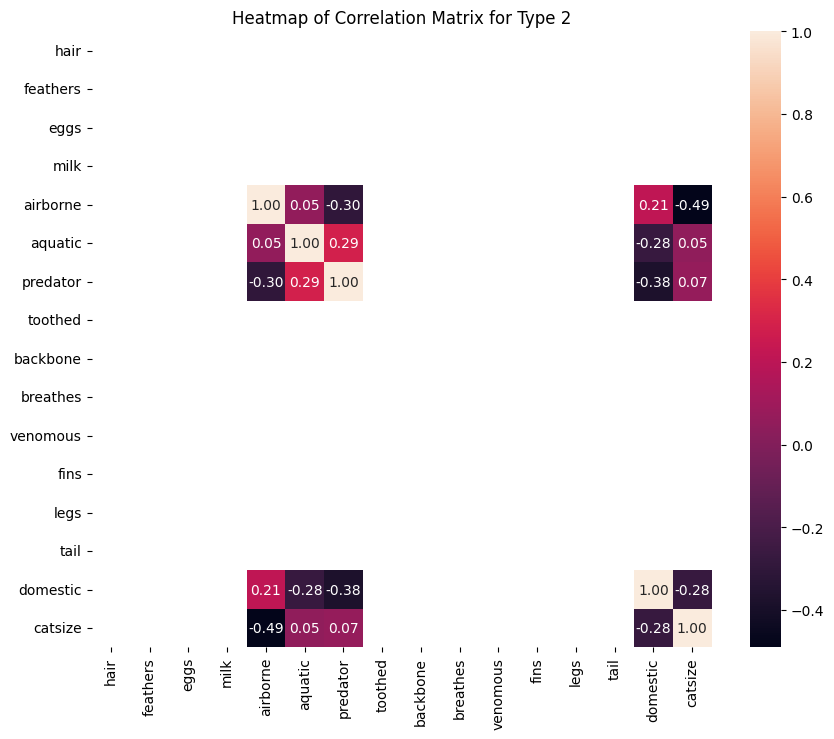

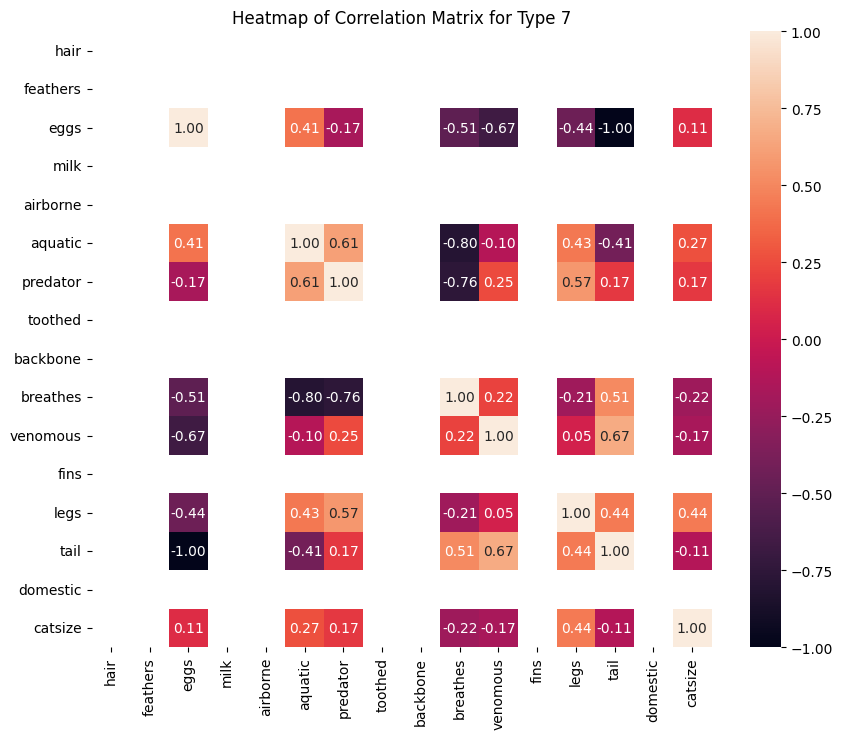

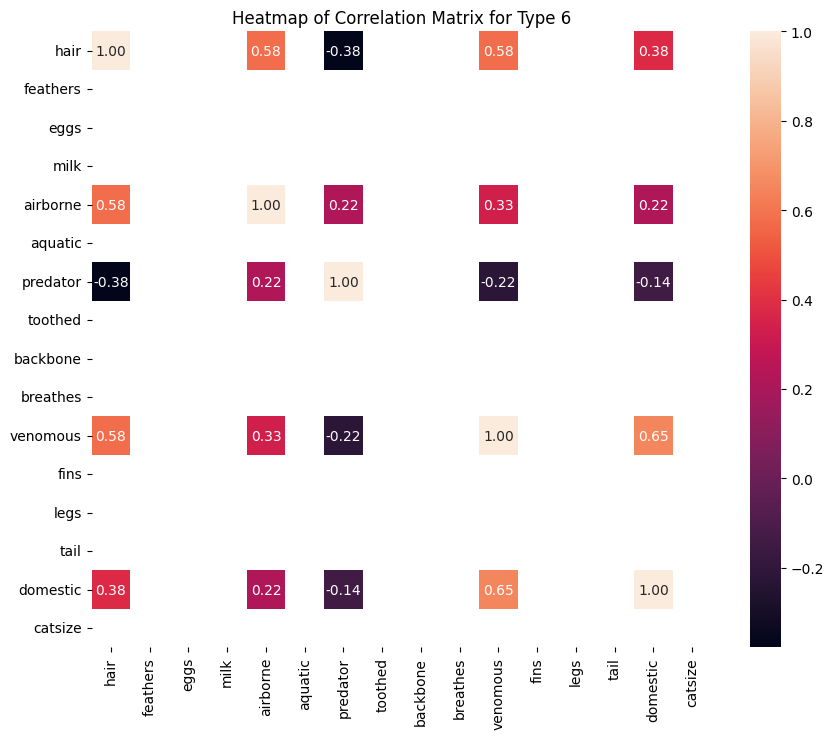

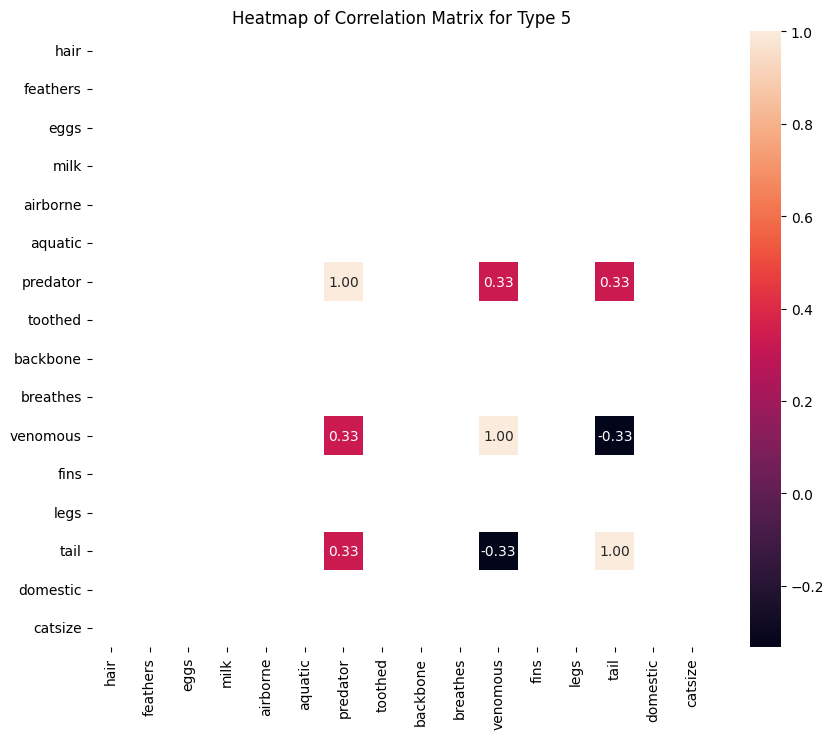

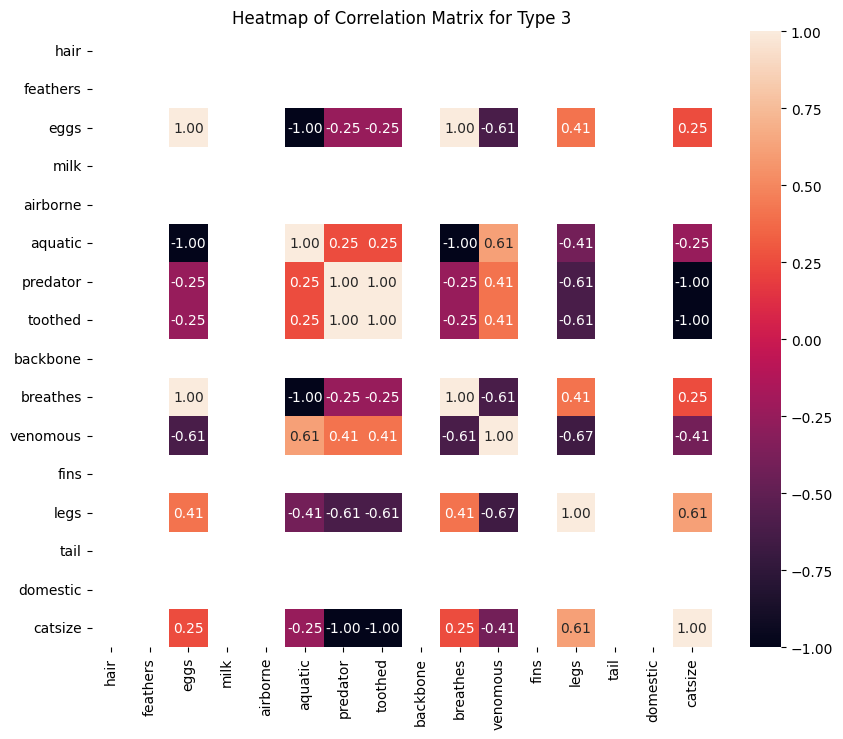

In [10]:
for unique_type in df['type'].unique():
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrices[unique_type], annot=True, fmt=".2f", cbar=True)
    plt.title(f"Heatmap of Correlation Matrix for Type {unique_type}")
    plt.show()

In [11]:
X= df.drop(["type"],axis=1)
y= df["type"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [14]:
cols=cols = ["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize"]

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,-0.904534,-0.5,0.881917,-0.859727,-0.538816,-0.693889,0.881917,0.816497,0.460566,0.460566,3.511885,-0.399275,-1.488248,0.596601,-0.420084,-0.951190
1,1.105542,-0.5,-1.133893,1.163160,-0.538816,-0.693889,0.881917,0.816497,0.460566,0.460566,-0.284747,-0.399275,0.555698,-1.676163,-0.420084,1.051315
2,-0.904534,2.0,0.881917,-0.859727,-0.538816,-0.693889,0.881917,-1.224745,0.460566,0.460566,-0.284747,-0.399275,-0.466275,0.596601,-0.420084,1.051315
3,1.105542,-0.5,-1.133893,1.163160,-0.538816,-0.693889,0.881917,0.816497,0.460566,0.460566,-0.284747,-0.399275,0.555698,0.596601,-0.420084,1.051315
4,1.105542,-0.5,-1.133893,1.163160,-0.538816,1.441153,0.881917,0.816497,0.460566,0.460566,-0.284747,-0.399275,0.555698,0.596601,-0.420084,1.051315


In [15]:
knn=KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred=knn.predict(X_test)
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 7, 2, 4, 2])

In [18]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9524


In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))
cm_s = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm_s)

Training set score: 0.9625
Test set score: 0.9524
Confusion matrix

 [[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 2]]


In [20]:
y_test.value_counts()

type
1    7
4    5
2    4
7    2
6    2
5    1
Name: count, dtype: int64

In [21]:


cm = confusion_matrix(y_test, y_pred)

In [22]:
knn_4 = KNeighborsClassifier(n_neighbors=4)


# fit the model to the training set
knn_4.fit(X_train, y_train)


# predict on the test-set
y_pred_4 = knn_4.predict(X_test)


print('Model accuracy score with k=4 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_4)))

cm_4 = confusion_matrix(y_test, y_pred_4)

print('Confusion matrix\n\n', cm_4)


Model accuracy score with k=4 : 1.0000
Confusion matrix

 [[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [23]:
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)
print(y_pred_5)

print('Model accuracy score with k=5 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_5)))

cm_5 = confusion_matrix(y_test, y_pred_5)

print('Confusion matrix\n\n', cm_5)


[5 4 4 1 1 1 2 4 1 1 7 1 2 7 4 6 1 6 2 4 2]
Model accuracy score with k=5 : 1.000000
Confusion matrix

 [[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [24]:
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)
print(y_pred_6)
print(y_test)

print('Model accuracy score with k=6 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_6)))

cm_6 = confusion_matrix(y_test, y_pred_6)

print('Confusion matrix\n\n', cm_6)


[5 4 4 1 1 1 2 4 1 1 7 1 2 7 4 6 1 6 2 4 2]
26    5
86    4
2     4
55    1
75    1
94    1
16    2
73    4
54    1
96    1
53    7
93    1
78    2
13    7
7     4
30    6
22    1
24    6
33    2
8     4
43    2
Name: type, dtype: int64
Model accuracy score with k=6 : 1.000000
Confusion matrix

 [[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [25]:
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.6f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.952381


In [26]:
data=df.drop(columns=["type"])
output_4= knn_4.predict(data)
output_5= knn_5.predict(data)
output_6= knn_6.predict(data)
print("4", output_4)
print("5", output_5)
print("6", output_6)
print('Model accuracy score with k=4 : {0:0.6f}'. format(accuracy_score(df["type"], output_4)))
print('Model accuracy score with k=5 : {0:0.6f}'. format(accuracy_score(df["type"], output_5)))
print('Model accuracy score with k=6 : {0:0.6f}'. format(accuracy_score(df["type"], output_6)))


4 [1 1 3 1 1 1 1 3 3 1 1 3 3 3 5 7 2 1 1 1 3 2 1 2 3 5 5 1 1 1 6 1 1 1 3 1 1
 2 3 6 6 1 6 3 1 1 7 1 1 1 1 6 1 7 1 1 3 3 1 3 1 3 3 1 1 1 1 1 1 1 1 2 1 3
 1 1 1 5 1 1 3 3 3 3 1 5 1 2 3 5 3 1 1 1 1 2 1 6 1 3 3]
5 [1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 5 2 1 1 1 2 2 1 2 3 1 1 1 1 1 6 1 1 2 1 1 1
 2 1 6 6 2 6 2 1 1 5 1 1 1 1 6 1 7 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 3 2 2 1 3 1 2 1 5 1 2 3 5 1 1 1 1 1 2 1 6 1 3 2]
6 [1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 5 2 1 1 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 1 1 1
 2 1 6 6 2 6 2 1 1 5 1 1 1 1 6 1 7 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 3 2 2 1 3 1 2 1 5 1 2 6 5 1 1 1 1 1 2 1 6 1 3 2]
Model accuracy score with k=4 : 0.623762
Model accuracy score with k=5 : 0.673267
Model accuracy score with k=6 : 0.712871


In [27]:
knn_4.fit(data,df["type"])
knn_5.fit(data,df["type"])
knn_6.fit(data,df["type"])

KNeighborsClassifier(n_neighbors=6)

In [28]:
output_4= knn_4.predict(data)
print("4", output_4)
print('Model accuracy score with k=4 : {0:0.4f}'. format(accuracy_score(df["type"], output_4)))
output_5= knn_5.predict(data)
print("5", output_5)
print('Model accuracy score with k=5 : {0:0.6f}'. format(accuracy_score(df["type"], output_5)))
output_6= knn_6.predict(data)
print("6", output_6)
print('Model accuracy score with k=6 : {0:0.6f}'. format(accuracy_score(df["type"], output_6)))

4 [1 1 4 1 1 1 1 4 4 1 1 2 4 7 5 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 6 4
 1 1 4 7 2 2 3 7 4 2 1 7 4 2 6 5 1 5 4 1 1 2 1 6 1 7 2]
Model accuracy score with k=4 : 0.9505
5 [1 1 4 1 1 1 1 4 4 1 1 2 4 7 5 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 6 4
 1 1 4 7 2 2 4 7 4 2 1 7 4 2 6 5 1 1 4 1 1 2 1 6 1 7 2]
Model accuracy score with k=5 : 0.940594
6 [1 1 4 1 1 1 1 4 4 1 1 2 4 7 5 6 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 6 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 6 4
 1 1 4 7 2 2 4 7 4 2 1 7 4 2 6 5 1 1 4 1 1 2 1 6 1 7 2]
Model accuracy score with k=6 : 0.920792
